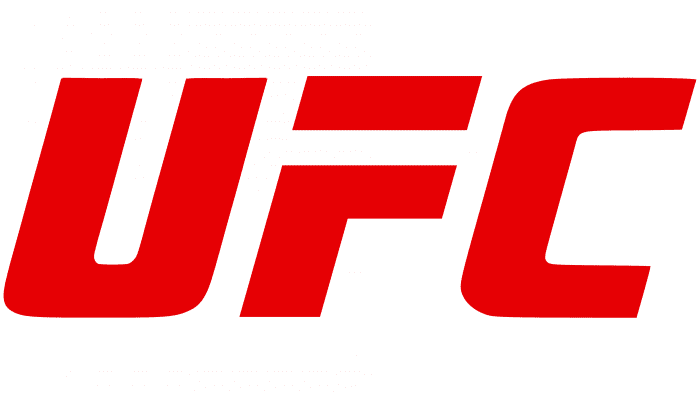

In [1]:
from IPython import display
display.Image('ufc.png')

# Analysing UFC Fight Data for Machine Learning

The purpose of this notebook is to use machine learning models to successful predict the outcome of a fight between two figther (Red Fighter & BLue Fighter) using all hostorical data from the Ulimate Fighting Championship. This notebook is broken down into the following areas:

1. Loading UFC historical fight data 
2. Analysing the state of the data
3. UFC data dictionary
4. Data processing
5. Data cleaning 
6. Machine learning models
7. Conclusion and Analysis

# Libraries 

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import missingno as msno
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

# set the float format to 2 decimal places
pd.set_option('float_format', '{:.2f}'.format)
pd.set_option('display.precision', 2)

# set the display to max columns
pd.set_option('display.max_columns', None)

# set the display to 30 rows
pd.set_option('display.max_rows', 30)

# set the column width
pd.set_option('display.max_colwidth', 20)

import warnings
warnings.filterwarnings('ignore')

In [7]:
data=pd.read_csv('data.csv')

In [11]:
for i,j in enumerate(data.columns):
    print(i,j,data[[j]].skew())

0 R_fighter Series([], dtype: float64)
1 B_fighter Series([], dtype: float64)
2 Referee Series([], dtype: float64)
3 date Series([], dtype: float64)
4 location Series([], dtype: float64)
5 Winner Series([], dtype: float64)
6 title_bout title_bout   3.68
dtype: float64
7 weight_class Series([], dtype: float64)
8 B_avg_KD B_avg_KD   2.27
dtype: float64
9 B_avg_opp_KD B_avg_opp_KD   2.52
dtype: float64
10 B_avg_SIG_STR_pct B_avg_SIG_STR_pct   0.05
dtype: float64
11 B_avg_opp_SIG_STR_pct B_avg_opp_SIG_STR_pct   0.34
dtype: float64
12 B_avg_TD_pct B_avg_TD_pct   0.80
dtype: float64
13 B_avg_opp_TD_pct B_avg_opp_TD_pct   1.05
dtype: float64
14 B_avg_SUB_ATT B_avg_SUB_ATT   2.85
dtype: float64
15 B_avg_opp_SUB_ATT B_avg_opp_SUB_ATT   2.92
dtype: float64
16 B_avg_REV B_avg_REV   3.49
dtype: float64
17 B_avg_opp_REV B_avg_opp_REV   3.58
dtype: float64
18 B_avg_SIG_STR_att B_avg_SIG_STR_att   1.11
dtype: float64
19 B_avg_SIG_STR_landed B_avg_SIG_STR_landed   1.11
dtype: float64
20 B_avg_opp_SIG_

139 R_Height_cms R_Height_cms   -0.08
dtype: float64
140 R_Reach_cms R_Reach_cms   -0.08
dtype: float64
141 R_Weight_lbs R_Weight_lbs   0.95
dtype: float64
142 B_age B_age   0.42
dtype: float64
143 R_age R_age   0.30
dtype: float64


In [8]:
data.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_avg_KD,R_avg_opp_KD,R_avg_SIG_STR_pct,R_avg_opp_SIG_STR_pct,R_avg_TD_pct,R_avg_opp_TD_pct,R_avg_SUB_ATT,R_avg_opp_SUB_ATT,R_avg_REV,R_avg_opp_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,2021-03-20,"Las Vegas, Nevad...",Red,False,Bantamweight,0.00,0.00,0.42,0.49,0.33,0.36,0.50,1.00,0.00,0.00,50.00,20.00,84.00,45.00,76.50,41.00,114.00,64.00,1.50,1.00,9.00,6.50,39.50,11.00,63.00,27.50,7.50,7.00,12.00,9.00,3.00,2.00,9.00,8.50,35.00,12.50,43.50,17.50,10.50,4.50,4.00,3.00,4.50,3.00,36.50,24.50,34.00,277.50,531.50,4,0,0,1,1,1,1,0,0,0,0,0,1,0,Orthodox,165.10,170.18,135.00,1.00,0.00,0.50,0.46,0.00,0.00,0.00,0.00,0.00,0.00,34.00,17.00,13.00,6.00,35.00,18.00,16.00,9.00,0.00,0.00,3.00,0.00,32.00,15.00,11.00,5.00,2.00,2.00,2.00,1.00,0.00,0.00,0.00,0.00,33.00,16.00,12.00,6.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,5.00,54.00,166.00,1,0,1,0,1,1,0,0,0,0,0,1,0,0,Orthodox,170.18,177.80,135.00,31.00,27.00
1,Trevin Giles,Roman Dolidze,Herb Dean,2021-03-20,"Las Vegas, Nevad...",Red,False,Middleweight,0.50,0.00,0.66,0.30,0.30,0.50,1.50,0.00,0.00,0.00,65.50,35.00,50.00,16.50,113.50,68.50,68.50,29.00,2.50,1.50,0.50,0.50,46.00,20.00,36.00,7.50,12.00,8.00,8.00,3.00,7.50,7.00,6.00,6.00,58.00,30.00,48.00,15.50,0.50,0.50,0.50,0.50,7.00,4.50,1.50,0.50,219.50,24.50,577.50,4,0,2,0,2,2,0,0,0,1,0,1,0,0,Orthodox,187.96,193.04,205.00,1.03,0.06,0.58,0.38,0.41,0.12,0.25,1.19,0.38,0.25,77.56,43.16,69.16,27.59,93.12,57.22,98.34,52.47,1.28,0.78,4.69,0.44,71.09,38.06,50.41,13.34,4.69,3.31,9.09,6.16,1.78,1.78,9.66,8.09,58.31,30.44,63.3

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6012 entries, 0 to 6011
Columns: 144 entries, R_fighter to R_age
dtypes: bool(1), float64(106), int64(28), object(9)
memory usage: 6.6+ MB


In [6]:
data.describe()

,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_avg_KD,R_avg_opp_KD,R_avg_SIG_STR_pct,R_avg_opp_SIG_STR_pct,R_avg_TD_pct,R_avg_opp_TD_pct,R_avg_SUB_ATT,R_avg_opp_SUB_ATT,R_avg_REV,R_avg_opp_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
count,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,6012.00,6012.00,6012.00,6012.00,6012.00,6012.00,6012.00,6012.00,6012.00,6012.00,6012.00,6012.00,6012.00,6012.00,6002.00,5121.00,6004.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,6012.00,6012.00,6012.00,6012.00,6012.00,6012.00,6012.00,6012.00,6012.00,6012.00,6012.00,6012.00,6012.00,6012.00,6008.00,5606.00,6010.00,5840.00,5949.00
mean,0.25,0.18,0.45,0.43,0.29,0.27,0.48,0.41,0.16,0.14,76.29,33.34,73.09,31.05,97.64,52.28,92.72,48.50,2.73,1.11,2.86,1.07,59.98,21.39,57.06,19.40,9.68,6.68,9.37,6.35,6.62,5.27,6.67,5.30,60.06,22.31,58.57,21.29,8.07,5.51,7.48,5.05,8.16,5.51,7.04,4.72,137.28,132.59,611.41,9.44,0.28,0.95,0.40,1.63,2.58,1.54,0.00,0.02,0.22,0.84,0.90,0.57,0.04,178.95,183.23,170.59,0.24,0.19,0.46,0.43,0.30,0

# Defining the Data

<div style = "width: 800px; height: 250px; line-height: em; overflow:scroll;  padding: 5px; text-align:center">

<table ><tr><th>Column Name</th><th>Description</th></tr><tr><td>R_fighter</td><td>Name of red corner fighter</td></tr><tr><td>B_fighter</td><td>Name of blue corner fighter</td></tr><tr><td>Referee</td><td>Name of Referee</td></tr><tr><td>date</td><td>Date of fight</td></tr><tr><td>location</td><td>Location of fight</td></tr><tr><td>Winner</td><td>Winner of fight</td></tr><tr><td>title_bout</td><td>Where fight was championship bout</td></tr><tr><td>weight_class</td><td>Weight class of fighter</td></tr><tr><td>B_avg_KD</td><td>Average knockdowns caused by blue fighter</td></tr><tr><td>B_avg_opp_KD</td><td>Average knockdowns of opponent</td></tr><tr><td>B_avg_SIG_STR_pct</td><td>Average significant strikes landed percentage by blue fighter</td></tr><tr><td>B_avg_opp_SIG_STR_pct</td><td>Average significant strikes landed of opponent</td></tr><tr><td>B_avg_TD_pct</td><td>Average takedown percentage by blue fighter</td></tr><tr><td>B_avg_opp_TD_pct</td><td>Average takedown percentage of opponent</td></tr><tr><td>B_avg_SUB_ATT</td><td>Average submissions attempted by blue fighter</td></tr><tr><td>B_avg_opp_SUB_ATT</td><td>Average submissions attempted of opponent</td></tr><tr><td>B_avg_REV</td><td>Average number of reversals landed by blue fighter</td></tr><tr><td>B_avg_opp_REV</td><td>Average number of reversals of opponent</td></tr><tr><td>B_avg_SIG_STR_att</td><td>Average number of significant strikes attempted by blue fighter</td></tr><tr><td>B_avg_SIG_STR_landed</td><td>Average number of significant strikes landed by blue fighter</td></tr><tr><td>B_avg_opp_SIG_STR_att</td><td>Average number of significant strikes attempted of opponent</td></tr><tr><td>B_avg_opp_SIG_STR_landed</td><td>Average number of significant strikes landed of opponent</td></tr><tr><td>B_avg_TOTAL_STR_att</td><td>Average number of total strikes attempted by blue fighter</td></tr><tr><td>B_avg_TOTAL_STR_landed</td><td>Average number of total strikes landed attempted by blue fighter</td></tr><tr><td>B_avg_opp_TOTAL_STR_att</td><td>Average number of total strikes attempted of opponent</td></tr><tr><td>B_avg_opp_TOTAL_STR_landed</td><td>Average number of total strikes landed attempted of opponent</td></tr><tr><td>B_avg_TD_att</td><td>Average takedowns attempted by blue fighter</td></tr><tr><td>B_avg_TD_landed</td><td>Average takedowns landed by blue fighter</td></tr><tr><td>B_avg_opp_TD_att</td><td>Average takedowns attempted of opponent</td></tr><tr><td>B_avg_opp_TD_landed</td><td>Average takedowns landed of opponent</td></tr><tr><td>B_avg_HEAD_att</td><td>Average number of significant strikes to the head attempted by blue fighter</td></tr><tr><td>B_avg_HEAD_landed</td><td>Average number of significant strikes to the head landed by blue fighter</td></tr><tr><td>B_avg_opp_HEAD_att</td><td>Average number of significant strikes to the head attempted of opponent</td></tr><tr><td>B_avg_opp_HEAD_landed</td><td>Average number of significant strikes to the head landed of opponent</td></tr><tr><td>B_avg_BODY_att</td><td>Average number of body shots attempted by blue fighter</td></tr><tr><td>B_avg_BODY_landed</td><td>Average number of body shots landed by blue fighter</td></tr><tr><td>B_avg_opp_BODY_att</td><td>Average number of body shots attempted of opponent</td></tr><tr><td>B_avg_opp_BODY_landed</td><td>Average number of body shots landed of opponent</td></tr><tr><td>B_avg_LEG_att</td><td>Average leg kicks attempted by blue fighter</td></tr><tr><td>B_avg_LEG_landed</td><td>Average leg kicks landed by blue fighter</td></tr><tr><td>B_avg_opp_LEG_att</td><td>Average leg kicks attempted of opponent</td></tr><tr><td>B_avg_opp_LEG_landed</td><td>Average leg kicks landed of opponent</td></tr><tr><td>B_avg_DISTANCE_att</td><td>Average distance strikes attempted by blue fighter</td></tr><tr><td>B_avg_DISTANCE_landed</td><td>Average distance strikes landed by blue fighter</td></tr><tr><td>B_avg_opp_DISTANCE_att</td><td>Average distance strikes attempted of opponent</td></tr><tr><td>B_avg_opp_DISTANCE_landed</td><td>Average distance strikes landed of opponent</td></tr><tr><td>B_avg_CLINCH_att</td><td>Average significant strikes attempted in the clinch by blue fighter</td></tr><tr><td>B_avg_CLINCH_landed</td><td>Average significant strikes landed in the clinch by blue fighter</td></tr><tr><td>B_avg_opp_CLINCH_att</td><td>Average significant strikes attempted in the clinch of opponent</td></tr><tr><td>B_avg_opp_CLINCH_landed</td><td>Average significant strikes landed in the clinch of opponent</td></tr><tr><td>B_avg_GROUND_att</td><td>Average significant strikes attempted on the ground by blue fighter</td></tr><tr><td>B_avg_GROUND_landed</td><td>Average significant strikes landed on the ground by blue fighter</td></tr><tr><td>B_avg_opp_GROUND_att</td><td>Average significant strikes attempted on the ground of opponent</td></tr><tr><td>B_avg_opp_GROUND_landed</td><td>Average significant strikes landed on the ground of opponent</td></tr><tr><td>B_avg_CTRL_time(seconds)</td><td>Average fight control time by blue fighter in seconds</td></tr><tr><td>B_avg_opp_CTRL_time(seconds)</td><td>Average fight control time of opponent in seconds</td></tr><tr><td>B_total_time_fought(seconds)</td><td>Total time fought by blue fighter in seconds</td></tr><tr><td>B_total_rounds_fought</td><td>Total rounds fought by blue fighter</td></tr><tr><td>B_total_title_bouts</td><td>Total title boughts by blue fighter</td></tr><tr><td>B_current_win_streak</td><td>Current win streak by blue fighter</td></tr><tr><td>B_current_lose_streak</td><td>Current losing streak by blue fighter</td></tr><tr><td>B_longest_win_streak</td><td>Longest winning streak by blue fighter</td></tr><tr><td>B_wins</td><td>Total wins by blue fighter</td></tr><tr><td>B_losses</td><td>Total losses by blue fighter</td></tr><tr><td>B_draw</td><td>Total draws by blue fighter </td></tr><tr><td>B_win_by_Decision_Majority</td><td>Total wins by Majority Decision by blue fighter</td></tr><tr><td>B_win_by_Decision_Split</td><td>Total wins by Split Decision by blue fighter</td></tr><tr><td>B_win_by_Decision_Unanimous</td><td>Total wins by Unanimous Decision by blue fighter</td></tr><tr><td>B_win_by_KO/TKO</td><td>Total wins by Knock out / Technical knockout by blue fighter</td></tr><tr><td>B_win_by_Submission</td><td>Total wins by Submission by blue fighter</td></tr><tr><td>B_win_by_TKO_Doctor_Stoppage</td><td>Total wins by Doctor Stoppage by blue fighter</td></tr><tr><td>B_Stance</td><td>Fighter stance by blue fighter</td></tr><tr><td>B_Height_cms</td><td>Height in cms for blue fighter</td></tr><tr><td>B_Reach_cms</td><td>Reach in cms for blue fighter</td></tr><tr><td>B_Weight_lbs</td><td>Weight in lbs for blue fighter</td></tr><tr><td>R_avg_KD</td><td>Average knockdowns caused by red fighter</td></tr><tr><td>R_avg_opp_KD</td><td>Average knockdowns of opponent</td></tr><tr><td>R_avg_SIG_STR_pct</td><td>Average significant strikes landed percentage by red fighter</td></tr><tr><td>R_avg_opp_SIG_STR_pct</td><td>Average significant strikes landed of opponent</td></tr><tr><td>R_avg_TD_pct</td><td>Average takedown percentage by red fighter</td></tr><tr><td>R_avg_opp_TD_pct</td><td>Average takedown percentage of opponent</td></tr><tr><td>R_avg_SUB_ATT</td><td>Average submissions attempted by red fighter</td></tr><tr><td>R_avg_opp_SUB_ATT</td><td>Average submissions attempted of opponent</td></tr><tr><td>R_avg_REV</td><td>Average number of reversals landed by red fighter</td></tr><tr><td>R_avg_opp_REV</td><td>Average number of reversals of opponent</td></tr><tr><td>R_avg_SIG_STR_att</td><td>Average number of significant strikes attempted by red fighter</td></tr><tr><td>R_avg_SIG_STR_landed</td><td>Average number of significant strikes landed by red fighter</td></tr><tr><td>R_avg_opp_SIG_STR_att</td><td>Average number of significant strikes attempted of opponent</td></tr><tr><td>R_avg_opp_SIG_STR_landed</td><td>Average number of significant strikes landed of opponent</td></tr><tr><td>R_avg_TOTAL_STR_att</td><td>Average number of total strikes attempted by red fighter</td></tr><tr><td>R_avg_TOTAL_STR_landed</td><td>Average number of total strikes landed attempted by red fighter</td></tr><tr><td>R_avg_opp_TOTAL_STR_att</td><td>Average number of total strikes attempted of opponent</td></tr><tr><td>R_avg_opp_TOTAL_STR_landed</td><td>Average number of total strikes landed attempted of opponent</td></tr><tr><td>R_avg_TD_att</td><td>Average takedowns attempted by red fighter</td></tr><tr><td>R_avg_TD_landed</td><td>Average takedowns landed by red fighter</td></tr><tr><td>R_avg_opp_TD_att</td><td>Average takedowns attempted of opponent</td></tr><tr><td>R_avg_opp_TD_landed</td><td>Average takedowns landed of opponent</td></tr><tr><td>R_avg_HEAD_att</td><td>Average number of significant strikes to the head attempted by red fighter</td></tr><tr><td>R_avg_HEAD_landed</td><td>Average number of significant strikes to the head landed by red fighter</td></tr><tr><td>R_avg_opp_HEAD_att</td><td>Average number of significant strikes to the head attempted of opponent</td></tr><tr><td>R_avg_opp_HEAD_landed</td><td>Average number of significant strikes to the head landed of opponent</td></tr><tr><td>R_avg_BODY_att</td><td>Average number of body shots attempted by red fighter</td></tr><tr><td>R_avg_BODY_landed</td><td>Average number of body shots landed by red fighter</td></tr><tr><td>R_avg_opp_BODY_att</td><td>Average number of body shots attempted of opponent</td></tr><tr><td>R_avg_opp_BODY_landed</td><td>Average number of body shots landed of opponent</td></tr><tr><td>R_avg_LEG_att</td><td>Average leg kicks attempted by red fighter</td></tr><tr><td>R_avg_LEG_landed</td><td>Average leg kicks landed by red fighter</td></tr><tr><td>R_avg_opp_LEG_att</td><td>Average leg kicks attempted of opponent</td></tr><tr><td>R_avg_opp_LEG_landed</td><td>Average leg kicks landed of opponent</td></tr><tr><td>R_avg_DISTANCE_att</td><td>Average distance strikes attempted by red fighter</td></tr><tr><td>R_avg_DISTANCE_landed</td><td>Average distance strikes landed by red fighter</td></tr><tr><td>R_avg_opp_DISTANCE_att</td><td>Average distance strikes attempted of opponent</td></tr><tr><td>R_avg_opp_DISTANCE_landed</td><td>Average distance strikes landed of opponent</td></tr><tr><td>R_avg_CLINCH_att</td><td>Average significant strikes attempted in the clinch by red fighter</td></tr><tr><td>R_avg_CLINCH_landed</td><td>Average significant strikes landed in the clinch by red fighter</td></tr><tr><td>R_avg_opp_CLINCH_att</td><td>Average significant strikes attempted in the clinch of opponent</td></tr><tr><td>R_avg_opp_CLINCH_landed</td><td>Average significant strikes landed in the clinch of opponent</td></tr><tr><td>R_avg_GROUND_att</td><td>Average significant strikes attempted on the ground by red fighter</td></tr><tr><td>R_avg_GROUND_landed</td><td>Average significant strikes landed on the ground by red fighter</td></tr><tr><td>R_avg_opp_GROUND_att</td><td>Average significant strikes attempted on the ground of opponent</td></tr><tr><td>R_avg_opp_GROUND_landed</td><td>Average significant strikes landed on the ground of opponent</td></tr><tr><td>R_avg_CTRL_time(seconds)</td><td>Average fight control time by red fighter in seconds</td></tr><tr><td>R_avg_opp_CTRL_time(seconds)</td><td>Average fight control time of opponent in seconds</td></tr><tr><td>R_total_time_fought(seconds)</td><td>Total time fought by red fighter in seconds</td></tr><tr><td>R_total_rounds_fought</td><td>Total rounds fought by red fighter</td></tr><tr><td>R_total_title_bouts</td><td>Total title boughts by red fighter</td></tr><tr><td>R_current_win_streak</td><td>Current win streak by red fighter</td></tr><tr><td>R_current_lose_streak</td><td>Current losing streak by red fighter</td></tr><tr><td>R_longest_win_streak</td><td>Longest winning streak by red fighter</td></tr><tr><td>R_wins</td><td>Total wins by red fighter</td></tr><tr><td>R_losses</td><td>Total losses by red fighter</td></tr><tr><td>R_draw</td><td>Total draws by red fighter </td></tr><tr><td>R_win_by_Decision_Majority</td><td>Total wins by Majority Decision by red fighter</td></tr><tr><td>R_win_by_Decision_Split</td><td>Total wins by Split Decision by red fighter</td></tr><tr><td>R_win_by_Decision_Unanimous</td><td>Total wins by Unanimous Decision by red fighter</td></tr><tr><td>R_win_by_KO/TKO</td><td>Total wins by Knock out / Technical knockout by red fighter</td></tr><tr><td>R_win_by_Submission</td><td>Total wins by Submission by red fighter</td></tr><tr><td>R_win_by_TKO_Doctor_Stoppage</td><td>Total wins by Doctor Stoppage by red fighter</td></tr><tr><td>R_Stance</td><td>Fighter stance by red fighter</td></tr><tr><td>R_Height_cms</td><td>Height in cms for red fighter</td></tr><tr><td>R_Reach_cms</td><td>Reach in cms for red fighter</td></tr><tr><td>R_Weight_lbs</td><td>Weight in lbs for red fighter</td></tr><tr><td>B_age</td><td>Age of blue fighter</td></tr><tr><td>R_age</td><td>Age of red fighter</td></tr></table>

# Stastical Overview

In [29]:
col=list(data.select_dtypes('object').columns)
col.remove('date')

for i in col:
    data[i]=LabelEncoder().fit_transform(data[[i]])
# data[[col]]=LabelEncoder().fit_transform(data[[col]])

In [30]:

data

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_avg_KD,R_avg_opp_KD,R_avg_SIG_STR_pct,R_avg_opp_SIG_STR_pct,R_avg_TD_pct,R_avg_opp_TD_pct,R_avg_SUB_ATT,R_avg_opp_SUB_ATT,R_avg_REV,R_avg_opp_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,11,691,29,2021-03-20,78,2,False,0,0.00,0.00,0.42,0.49,0.33,0.36,0.50,1.00,0.00,0.00,50.00,20.00,84.00,45.00,76.50,41.00,114.00,64.00,1.50,1.00,9.00,6.50,39.50,11.00,63.00,27.50,7.50,7.00,12.00,9.00,3.00,2.00,9.00,8.50,35.00,12.50,43.50,17.50,10.50,4.50,4.00,3.00,4.50,3.00,36.50,24.50,34.00,277.50,531.50,4,0,0,1,1,1,1,0,0,0,0,0,1,0,1,165.10,170.18,135.00,1.00,0.00,0.50,0.46,0.00,0.00,0.00,0.00,0.00,0.00,34.00,17.00,13.00,6.00,35.00,18.00,16.00,9.00,0.00,0.00,3.00,0.00,32.00,15.00,11.00,5.00,2.00,2.00,2.00,1.00,0.00,0.00,0.00,0.00,33.00,16.00,12.00,6.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,5.00,54.00,166.00,1,0,1,0,1,1,0,0,0,0,0,1,0,0,1,170.18,177.80,135.00,31.00,27.00
1,1422,1616,65,2021-03-20,78,2,False,7,0.50,0.00,0.66,0.30,0.30,0.50,1.50,0.00,0.00,0.00,65.50,35.00,50.00,16.50,113.50,68.50,68.50,29.00,2.50,1.50,0.50,0.50,46.00,20.00,36.00,7.50,12.00,8.00,8.00,3.00,7.50,7.00,6.00,6.00,58.00,30.00,48.00,15.50,0.50,0.50,0.50,0.50,7.00,4.50,1.50,0.50,219.50,24.50,577.50,4,0,2,0,2,2,0,0,0,1,0,1,0,0,1,187.96,193.04,205.00,1.03,0.06,0.58,0.38,0.41,0.12,0.25,1.19,0.38,0.25,77.56,43.16,69.16,27.59,93.12,57.22,98.34,52.47,1.28,0.78,4.69,0.44,71.09,38.06,50.41,13.34,4.69,3.31,9.09,6.16,1.78,1.78,9.66,8.09,58.31,30.44,63.31,23.12,6.97,3.66,5.00,4.12,12.28,9.06,0.84,0.34,176.16,154.69,747.34,17,0,2,0,2,4,2,0,0,1,0,3,0,0,1,182.88,187.96,185.00,32.00,28.00
2,1360

In [22]:
col=list(data.select_dtypes('object').columns).remove('date')

data[[col]]=LabelEncoder().fit_transform(data[[col]])a

KeyError: "None of [Index([None], dtype='object')] are in the [columns]"

In [8]:
def columns_summary(df):
    cs={}
    for i in df.columns:
        cs[i]=df[i].describe()
        cs[f'null {i}']=df[i].isnull().sum()
        cs[f'null % {i}']=round((df[i].isnull().sum()/len(df[i].index))*100,2)
    return cs
print('Summary Statistics:')
summary=columns_summary(data)

summary_df=pd.DataFrame(summary).fillna('🥊')
summary_df

Summary Statistics:


,R_fighter,null R_fighter,null % R_fighter,B_fighter,null B_fighter,null % B_fighter,Referee,null Referee,null % Referee,date,null date,null % date,location,null location,null % location,Winner,null Winner,null % Winner,title_bout,null title_bout,null % title_bout,weight_class,null weight_class,null % weight_class,B_avg_KD,null B_avg_KD,null % B_avg_KD,B_avg_opp_KD,null B_avg_opp_KD,null % B_avg_opp_KD,B_avg_SIG_STR_pct,null B_avg_SIG_STR_pct,null % B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,null B_avg_opp_SIG_STR_pct,null % B_avg_opp_SIG_STR_pct,B_avg_TD_pct,null B_avg_TD_pct,null % B_avg_TD_pct,B_avg_opp_TD_pct,null B_avg_opp_TD_pct,null % B_avg_opp_TD_pct,B_avg_SUB_ATT,null B_avg_SUB_ATT,null % B_avg_SUB_ATT,B_avg_opp_SUB_ATT,null B_avg_opp_SUB_ATT,null % B_avg_opp_SUB_ATT,B_avg_REV,null B_avg_REV,null % B_avg_REV,B_avg_opp_REV,null B_avg_opp_REV,null % B_avg_opp_REV,B_avg_SIG_STR_att,null B_avg_SIG_STR_att,null % B_avg_SIG_STR_att,B_avg_SIG_STR_landed,null B_avg_SIG_STR_landed,null % B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,null B_avg_opp_SIG_STR_att,null % B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,null B_avg_opp_SIG_STR_landed,null % B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,null B_avg_TOTAL_STR_att,null % B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,null B_avg_TOTAL_STR_landed,null % B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,null B_avg_opp_TOTAL_STR_att,null % B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,null B_avg_opp_TOTAL_STR_landed,null % B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,null B_avg_TD_att,null % B_avg_TD_att,B_avg_TD_landed,null B_avg_TD_landed,null % B_avg_TD_landed,B_avg_opp_TD_att,null B_avg_opp_TD_att,null % B_avg_opp_TD_att,B_avg_opp_TD_landed,null B_avg_opp_TD_landed,null % B_avg_opp_TD_landed,B_avg_HEAD_att,null B_avg_HEAD_att,null % B_avg_HEAD_att,B_avg_HEAD_landed,null B_avg_HEAD_landed,null % B_avg_HEAD_landed,B_avg_opp_HEAD_att,null B_avg_opp_HEAD_att,null % B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,null B_avg_opp_HEAD_landed,null % B_avg_opp_HEAD_landed,B_avg_BODY_att,null B_avg_BODY_att,null % B_avg_BODY_att,B_avg_BODY_landed,null B_avg_BODY_landed,null % B_avg_BODY_landed,B_avg_opp_BODY_att,null B_avg_opp_BODY_att,null % B_avg_opp_BODY_att,B_avg_opp_BODY_landed,null B_avg_opp_BODY_landed,null % B_avg_opp_BODY_landed,B_avg_LEG_att,null B_avg_LEG_att,null % B_avg_LEG_att,B_avg_LEG_landed,null B_avg_LEG_landed,null % B_avg_LEG_landed,B_avg_opp_LEG_att,null B_avg_opp_LEG_att,null % B_avg_opp_LEG_att,B_avg_opp_LEG_landed,null B_avg_opp_LEG_landed,null % B_avg_opp_LEG_landed,B_avg_DISTANCE_att,null B_avg_DISTANCE_att,null % B_avg_DISTANCE_att,B_avg_DISTANCE_landed,null B_avg_DISTANCE_landed,null % B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,null B_avg_opp_DISTANCE_att,null % B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,null B_avg_opp_DISTANCE_landed,null % B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,null B_avg_CLINCH_att,null % B_avg_CLINCH_att,B_avg_CLINCH_landed,null B_avg_CLINCH_landed,null % B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,null B_avg_opp_CLINCH_att,null % B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,null B_avg_opp_CLINCH_landed,null % B_avg_opp_CLINCH_landed,B_avg_GROUND_att,null B_avg_GROUND_att,null % B_avg_GROUND_att,B_avg_GROUND_landed,null B_avg_GROUND_landed,null % B_avg_GROUND_landed,B_avg_opp_GROUND_att,null B_avg_opp_GROUND_att,null % B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,null B_avg_opp_GROUND_landed,null % B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),null B_avg_CTRL_time(seconds),null % B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),null B_avg_opp_CTRL_time(seconds),null % B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),null B_total_time_fought(seconds),null % B_total_time_fought(seconds),B_total_rounds_fought,null B_total_rounds_fought,null % B_total_rounds_fought,B_total_title_bouts,null B_total_title_bouts,null % B_total_title_bouts,B_current_win_streak,null B_current_win_streak,null % B_current_win_streak,B_current_lose_streak,nu

From the stastical overview we can see that the data set has high dimensality and is very noisy and contains lots of missing values. This will need to be addressed before ML models can be run on the dataset.

### Analysis of the discrete variables

The purpose of this is to identify and use median replace to remove outliers in the discrete variables, in doing this the hope is to reduce model over/underfitting.

In [9]:
int_columns=data.select_dtypes(int).columns

print('Integer Columns: ')
print(int_columns)
print(f'Count of Integer columns: {len(int_columns)}')

Integer Columns: 
Index(['B_total_rounds_fought', 'B_total_title_bouts', 'B_current_win_streak',
       'B_current_lose_streak', 'B_longest_win_streak', 'B_wins', 'B_losses',
       'B_draw', 'B_win_by_Decision_Majority', 'B_win_by_Decision_Split',
       'B_win_by_Decision_Unanimous', 'B_win_by_KO/TKO', 'B_win_by_Submission',
       'B_win_by_TKO_Doctor_Stoppage', 'R_total_rounds_fought',
       'R_total_title_bouts', 'R_current_win_streak', 'R_current_lose_streak',
       'R_longest_win_streak', 'R_wins', 'R_losses', 'R_draw',
       'R_win_by_Decision_Majority', 'R_win_by_Decision_Split',
       'R_win_by_Decision_Unanimous', 'R_win_by_KO/TKO', 'R_win_by_Submission',
       'R_win_by_TKO_Doctor_Stoppage'],
      dtype='object')
Count of Integer columns: 28


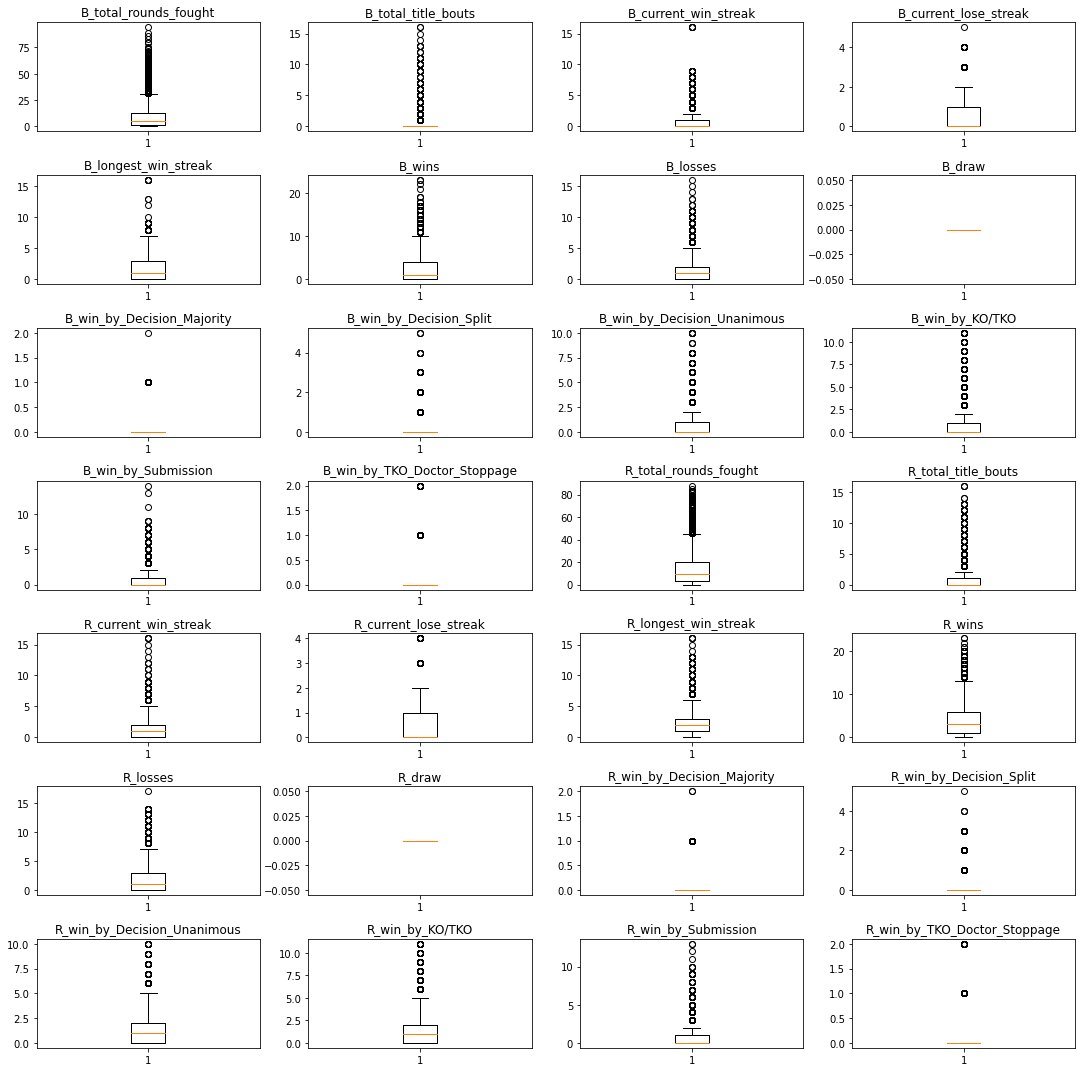

In [10]:
out={}
plt.figure(figsize=(15,15))
for  index,val in enumerate(data[int_columns]):
    plt.subplot(7,4,index+1)
    box=plt.boxplot(data[val])
    plt.title(val)
    out[val]=box['fliers'][0].get_ydata()
    
plt.tight_layout()
plt.show()

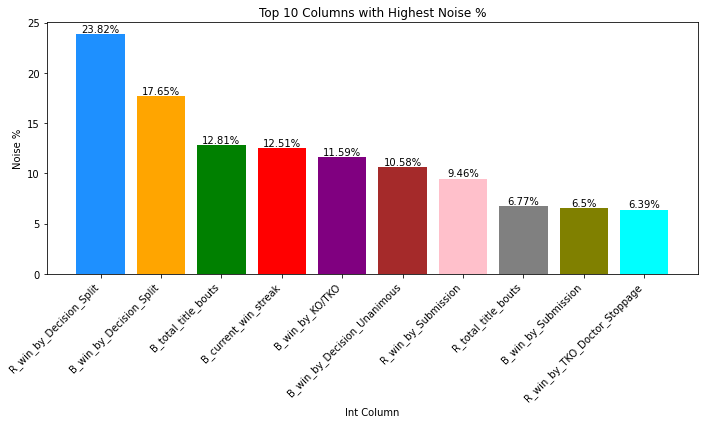

In [11]:
# Top 10 columns with outliers
outliers_int=pd.DataFrame(columns=['Column_Name','Noise %'])

c=0

for i,j in out.items():
#     print(i,len(j)/len(data[i])*100)
    outliers_int.loc[c]=(i,len(j)/len(data[i])*100)
    c+=1

outliers_int.sort_values(by='Noise %',inplace=True,ascending=False)

top_10=outliers_int.head(10)
pd.set_option('display.max_colwidth', 25)
outliers_int.sort_values(by='Noise %',ascending=False,inplace=True)

colors = ['dodgerblue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

fig, ax = plt.subplots(figsize=(10, 6))  

bars = ax.bar(range(len(top_10)), top_10['Noise %'], color=colors) 
plt.xticks(range(len(top_10)), top_10['Column_Name'], rotation=45, ha='right')
plt.xlabel('Int Column') 
plt.ylabel('Noise %') 
plt.title('Top 10 Columns with Highest Noise %') 

for i, bar in enumerate(bars):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(round(top_10['Noise %'][outliers_int.index[i]],2)) + '%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [12]:
# Storing all the index positions
index_positions = []
for i in out.keys():
    index_positions.extend(list(np.where(np.isin(data[i], out[i]))[0]))

In [4]:
# Outlier DataFrame
outlier_df = data.loc[index_positions]
print('Outlier DataFrame:')
outlier_df

NameError: name 'data' is not defined

In [14]:
# Change the outlier values with median
for i in out.keys():
    index_positions = list(np.where(np.isin(data[i], out[i]))[0])
    data[i][index_positions] = data[i].median()
    
print('Count of null values in each column:')
print(data.isnull().sum())

Count of null values in each column:
R_fighter         0
B_fighter         0
Referee          32
date              0
location          0
               ... 
R_Height_cms      4
R_Reach_cms     406
R_Weight_lbs      2
B_age           172
R_age            63
Length: 144, dtype: int64


In [15]:
# Example of changing outlier values in a specific column
median = data['B_avg_KD'].median()
index_positions = np.where(np.isin(data['B_total_rounds_fought'], out['B_total_rounds_fought']))[0]
data['B_total_rounds_fought'][index_positions] = median

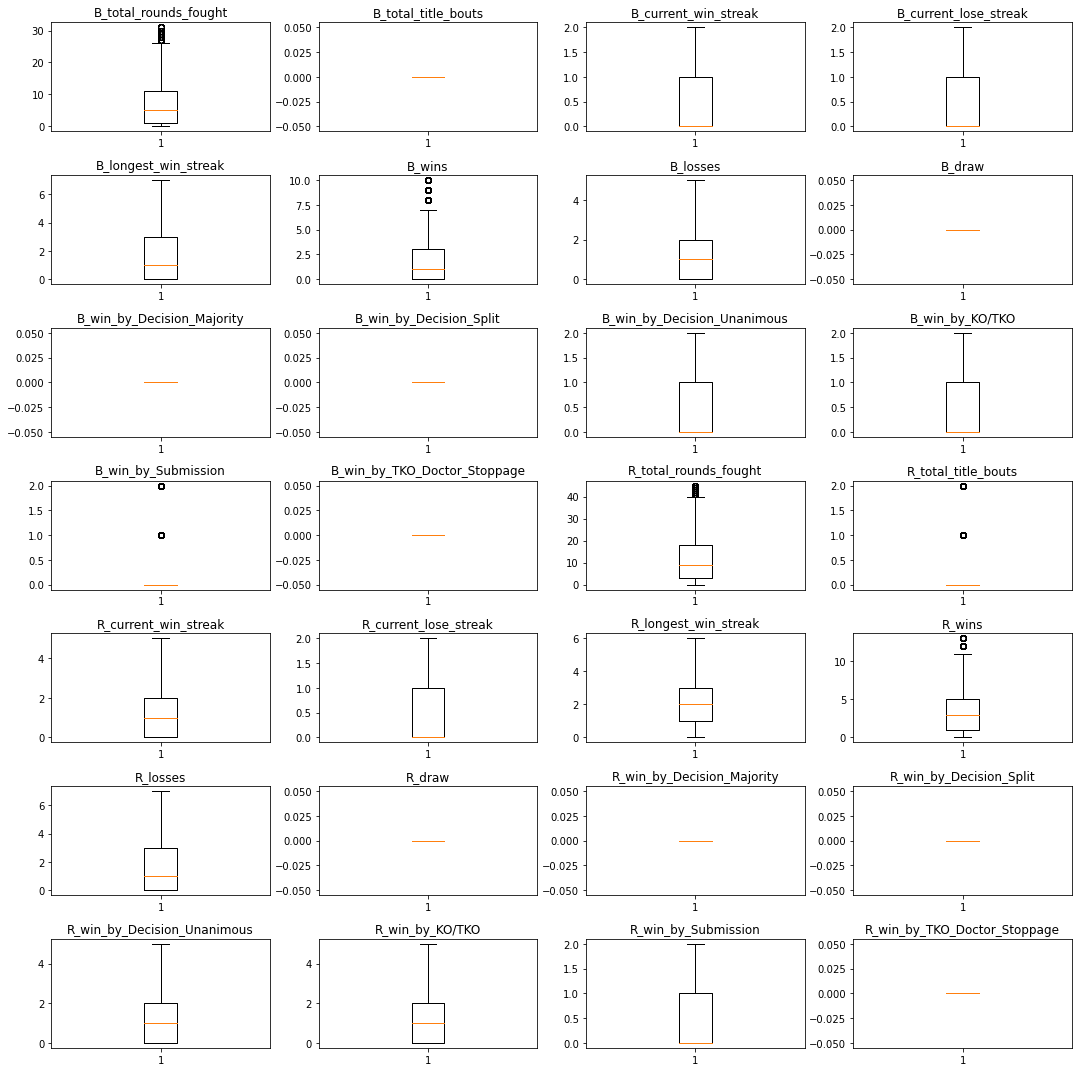

In [16]:
out={}
plt.figure(figsize=(15,15))
for  index,val in enumerate(data[int_columns]):
    plt.subplot(7,4,index+1)
    box=plt.boxplot(data[val])
    plt.title(val)
    out[val]=box['fliers'][0].get_ydata()
    
plt.tight_layout()
plt.show()

In [17]:
# Review top 10 columns with outliers
# outliers_int=pd.DataFrame(columns=['Column_Name','Noise %'])

# c=0

# for i,j in out.items():
#     outliers_int.loc[c]=(i,len(j)/len(data[i])*100)
#     c+=1

# outliers_int.sort_values(by='Noise %',inplace=True,ascending=False)

# top_10=outliers_int.head(10)
# pd.set_option('display.max_colwidth', 25)
# outliers_int.sort_values(by='Noise %',ascending=False,inplace=True)

# colors = ['dodgerblue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

# fig, ax = plt.subplots(figsize=(10, 6))  

# bars = ax.bar(range(len(top_10)), top_10['Noise %'], color=colors) 
# plt.xticks(range(len(top_10)), top_10['Column_Name'], rotation=45, ha='right')
# plt.xlabel('Int Column') 
# plt.ylabel('Noise %') 
# plt.title('Top 10 Columns with Highest Noise %') 

# for i, bar in enumerate(bars):
#     ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(round(top_10['Noise %'][outliers_int.index[i]],2)) + '%', ha='center', va='bottom')

# plt.tight_layout()
# plt.show()

# Data Cleaning

<AxesSubplot:>

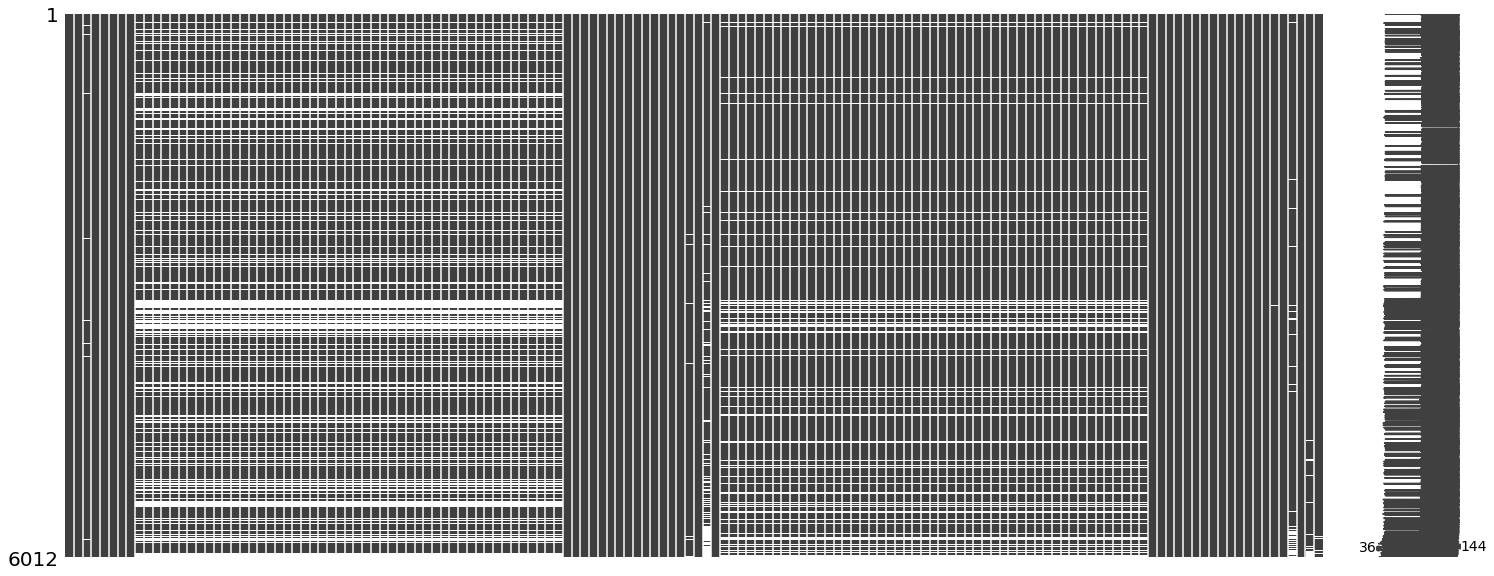

In [18]:
# Analysing the missing data 

msno.matrix(data)

This missingo matrix does not work in this case as we have too many dimensions thus this visualisation does not provide adequate detail, however we can use in built pandas function to help.

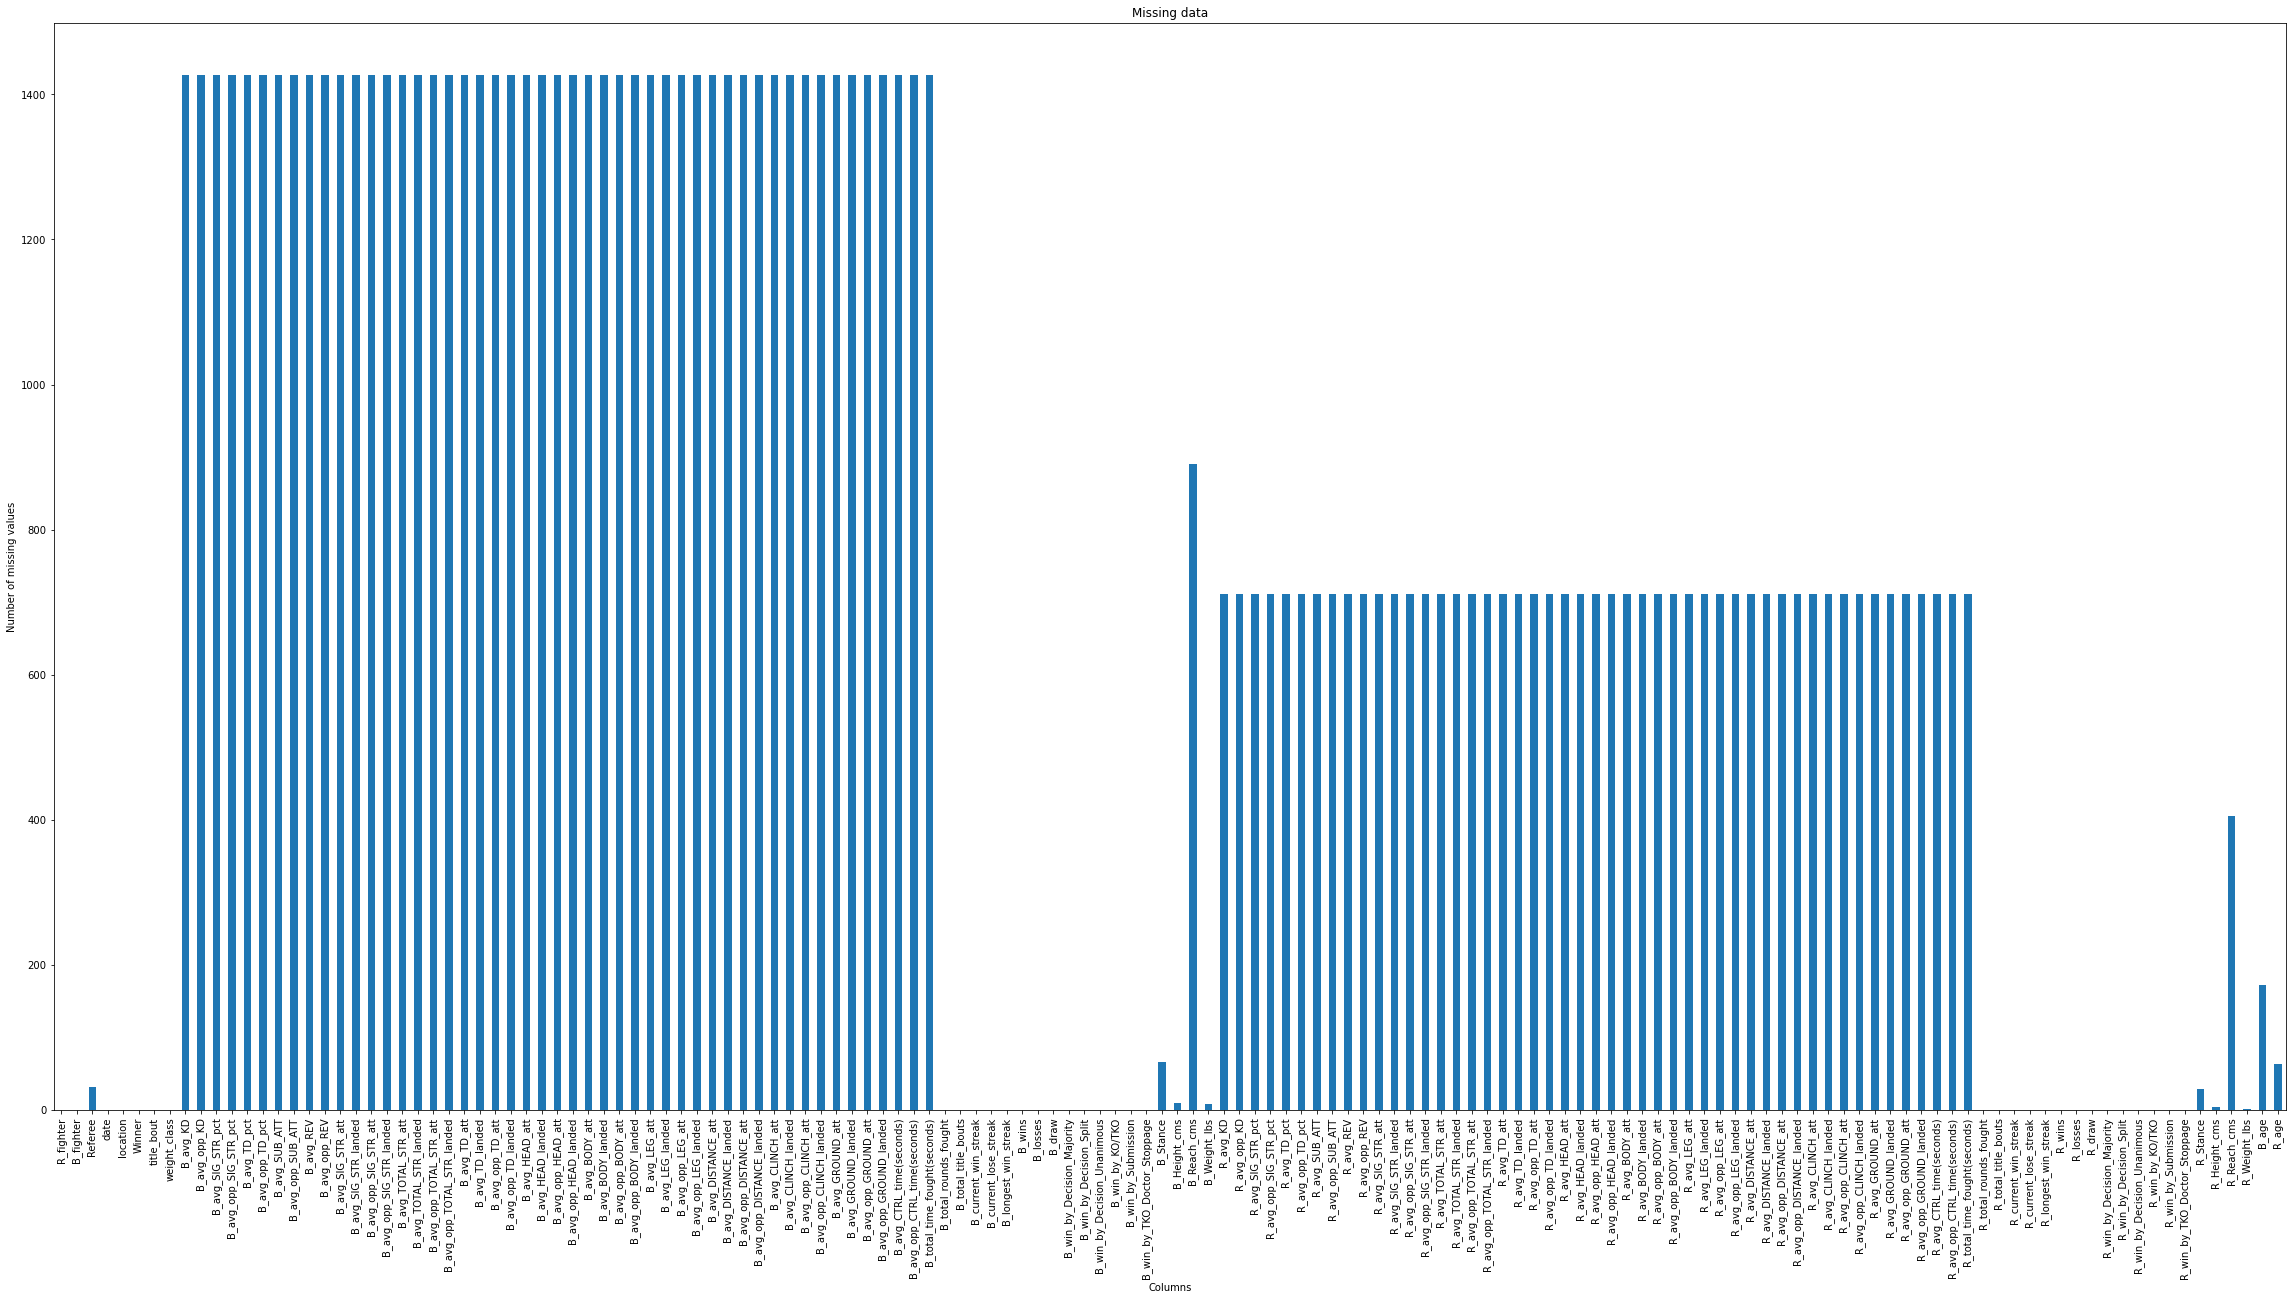

In [19]:
def missing_data(df):
    missing = df.isnull().sum()

    missing.plot(kind="bar", figsize=(40, 20))
    plt.xlabel("Columns")
    plt.ylabel("Number of missing values")
    plt.title("Missing data")
    plt.show()
    
    
missing_data(data)

In [ ]:
hyperparameters = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

logreg = LogisticRegression(max_iter=1000)


grid_search = GridSearchCV(logreg, hyperparameters, cv=5)

In [20]:
# Method 1: KNN and Standard Scaler

In [21]:
# cols_with_missing = data.columns[data.isna().any()].tolist()
# cols_with_missing

In [22]:
# Referee filled with mode rest with the mean of respective player
# data.Referee=data.Referee.fillna(data.Referee.mode()[0])

In [23]:
# KNN imputer to fill in the missing values
# imputer=KNNImputer()
# X=pd.get_dummies(data.drop('Winner',axis=1))
# complete_df=pd.DataFrame(imputer.fit_transform(X),columns=X.columns)

In [24]:
# data=pd.DataFrame(complete_df,columns=X.columns)
# data.to_csv('X.csv')

In [25]:
# from sklearn.decomposition import PCA
# from sklearn.manifold import TSNE
# from sklearn.preprocessing import StandardScaler

# scaler=StandardScaler()
# x_scl=pd.DataFrame(scaler.fit_transform(data),columns=data.columns)
# x_scl

In [26]:
# pca=PCA()
# pca.fit(complete_df)

In [27]:
# list(np.cumsum(pca.explained_variance_ratio_))

In [28]:
# plt.plot(np.cumsum(pca.explained_variance_ratio_))
# plt.show()

In [29]:
# Method 2: KNN and Standard Scaler 

In [30]:
objs = data.select_dtypes(include='object').columns.tolist()

print(objs)

['R_fighter', 'B_fighter', 'Referee', 'date', 'location', 'Winner', 'weight_class', 'B_Stance', 'R_Stance']


In [31]:
encoders = {}
for i in objs:
    encoders[i] = LabelEncoder()
    
for i, e in encoders.items():
    data[i] = e.fit_transform(data[i])

In [32]:
data.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_avg_KD,R_avg_opp_KD,R_avg_SIG_STR_pct,R_avg_opp_SIG_STR_pct,R_avg_TD_pct,R_avg_opp_TD_pct,R_avg_SUB_ATT,R_avg_opp_SUB_ATT,R_avg_REV,R_avg_opp_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,11,691,29,549,78,2,False,0,0.00,0.00,0.42,0.49,0.33,0.36,0.50,1.00,0.00,0.00,50.00,20.00,84.00,45.00,76.50,41.00,114.00,64.00,1.50,1.00,9.00,6.50,39.50,11.00,63.00,27.50,7.50,7.00,12.00,9.00,3.00,2.00,9.00,8.50,35.00,12.50,43.50,17.50,10.50,4.50,4.00,3.00,4.50,3.00,36.50,24.50,34.00,277.50,531.50,4.00,0,0,1,1,1,1,0,0,0,0,0,1,0,1,165.10,170.18,135.00,1.00,0.00,0.50,0.46,0.00,0.00,0.00,0.00,0.00,0.00,34.00,17.00,13.00,6.00,35.00,18.00,16.00,9.00,0.00,0.00,3.00,0.00,32.00,15.00,11.00,5.00,2.00,2.00,2.00,1.00,0.00,0.00,0.00,0.00,33.00,16.00,12.00,6.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,5.00,54.00,166.00,1,0,1,0,1,1,0,0,0,0,0,1,0,0,1,170.18,177.80,135.00,31.00,27.00
1,1422,1616,65,549,78,2,False,7,0.50,0.00,0.66,0.30,0.30,0.50,1.50,0.00,0.00,0.00,65.50,35.00,50.00,16.50,113.50,68.50,68.50,29.00,2.50,1.50,0.50,0.50,46.00,20.00,36.00,7.50,12.00,8.00,8.00,3.00,7.50,7.00,6.00,6.00,58.00,30.00,48.00,15.50,0.50,0.50,0.50,0.50,7.00,4.50,1.50,0.50,219.50,24.50,577.50,4.00,0,2,0,2,2,0,0,0,0,0,1,0,0,1,187.96,193.04,205.00,1.03,0.06,0.58,0.38,0.41,0.12,0.25,1.19,0.38,0.25,77.56,43.16,69.16,27.59,93.12,57.22,98.34,52.47,1.28,0.78,4.69,0.44,71.09,38.06,50.41,13.34,4.69,3.31,9.09,6.16,1.78,1.78,9.66,8.09,58.31,30.44,63.31,23.12,6.97,3.66,5.00,4.12,12.28,9.06,0.84,0.34,176.16,154.69,747.34,17,0,2,0,2,4,2,0,0,0,0,3,0,0,1,182.88,187.96,185.00,32.00,28.00
2,1360,700,65,

In [33]:
# Identify the features with missing values
missing_cols = [col for col in data.columns if data[col].isna().any()]

# Create a KNN imputer instance
imputer = KNNImputer(n_neighbors=5)

# Perform KNN imputation on the missing values
data[missing_cols] = imputer.fit_transform(data[missing_cols])

data.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_avg_KD,R_avg_opp_KD,R_avg_SIG_STR_pct,R_avg_opp_SIG_STR_pct,R_avg_TD_pct,R_avg_opp_TD_pct,R_avg_SUB_ATT,R_avg_opp_SUB_ATT,R_avg_REV,R_avg_opp_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,11,691,29,549,78,2,False,0,0.00,0.00,0.42,0.49,0.33,0.36,0.50,1.00,0.00,0.00,50.00,20.00,84.00,45.00,76.50,41.00,114.00,64.00,1.50,1.00,9.00,6.50,39.50,11.00,63.00,27.50,7.50,7.00,12.00,9.00,3.00,2.00,9.00,8.50,35.00,12.50,43.50,17.50,10.50,4.50,4.00,3.00,4.50,3.00,36.50,24.50,34.00,277.50,531.50,4.00,0,0,1,1,1,1,0,0,0,0,0,1,0,1,165.10,170.18,135.00,1.00,0.00,0.50,0.46,0.00,0.00,0.00,0.00,0.00,0.00,34.00,17.00,13.00,6.00,35.00,18.00,16.00,9.00,0.00,0.00,3.00,0.00,32.00,15.00,11.00,5.00,2.00,2.00,2.00,1.00,0.00,0.00,0.00,0.00,33.00,16.00,12.00,6.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,5.00,54.00,166.00,1,0,1,0,1,1,0,0,0,0,0,1,0,0,1,170.18,177.80,135.00,31.00,27.00
1,1422,1616,65,549,78,2,False,7,0.50,0.00,0.66,0.30,0.30,0.50,1.50,0.00,0.00,0.00,65.50,35.00,50.00,16.50,113.50,68.50,68.50,29.00,2.50,1.50,0.50,0.50,46.00,20.00,36.00,7.50,12.00,8.00,8.00,3.00,7.50,7.00,6.00,6.00,58.00,30.00,48.00,15.50,0.50,0.50,0.50,0.50,7.00,4.50,1.50,0.50,219.50,24.50,577.50,4.00,0,2,0,2,2,0,0,0,0,0,1,0,0,1,187.96,193.04,205.00,1.03,0.06,0.58,0.38,0.41,0.12,0.25,1.19,0.38,0.25,77.56,43.16,69.16,27.59,93.12,57.22,98.34,52.47,1.28,0.78,4.69,0.44,71.09,38.06,50.41,13.34,4.69,3.31,9.09,6.16,1.78,1.78,9.66,8.09,58.31,30.44,63.31,23.12,6.97,3.66,5.00,4.12,12.28,9.06,0.84,0.34,176.16,154.69,747.34,17,0,2,0,2,4,2,0,0,0,0,3,0,0,1,182.88,187.96,185.00,32.00,28.00
2,1360,700,65,

In [34]:
def columns_summary(df):
    cs={}
    for i in df.columns:
        cs[i]=df[i].describe()
        cs[f'null {i}']=df[i].isnull().sum()
        cs[f'null % {i}']=round((df[i].isnull().sum()/len(df[i].index))*100,2)
    return cs
print('Summary Statistics:')
summary=columns_summary(data)

summary_df=pd.DataFrame(summary).fillna('🥊')
summary_df.head()

Summary Statistics:


,R_fighter,null R_fighter,null % R_fighter,B_fighter,null B_fighter,null % B_fighter,Referee,null Referee,null % Referee,date,null date,null % date,location,null location,null % location,Winner,null Winner,null % Winner,title_bout,null title_bout,null % title_bout,weight_class,null weight_class,null % weight_class,B_avg_KD,null B_avg_KD,null % B_avg_KD,B_avg_opp_KD,null B_avg_opp_KD,null % B_avg_opp_KD,B_avg_SIG_STR_pct,null B_avg_SIG_STR_pct,null % B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,null B_avg_opp_SIG_STR_pct,null % B_avg_opp_SIG_STR_pct,B_avg_TD_pct,null B_avg_TD_pct,null % B_avg_TD_pct,B_avg_opp_TD_pct,null B_avg_opp_TD_pct,null % B_avg_opp_TD_pct,B_avg_SUB_ATT,null B_avg_SUB_ATT,null % B_avg_SUB_ATT,B_avg_opp_SUB_ATT,null B_avg_opp_SUB_ATT,null % B_avg_opp_SUB_ATT,B_avg_REV,null B_avg_REV,null % B_avg_REV,B_avg_opp_REV,null B_avg_opp_REV,null % B_avg_opp_REV,B_avg_SIG_STR_att,null B_avg_SIG_STR_att,null % B_avg_SIG_STR_att,B_avg_SIG_STR_landed,null B_avg_SIG_STR_landed,null % B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,null B_avg_opp_SIG_STR_att,null % B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,null B_avg_opp_SIG_STR_landed,null % B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,null B_avg_TOTAL_STR_att,null % B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,null B_avg_TOTAL_STR_landed,null % B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,null B_avg_opp_TOTAL_STR_att,null % B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,null B_avg_opp_TOTAL_STR_landed,null % B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,null B_avg_TD_att,null % B_avg_TD_att,B_avg_TD_landed,null B_avg_TD_landed,null % B_avg_TD_landed,B_avg_opp_TD_att,null B_avg_opp_TD_att,null % B_avg_opp_TD_att,B_avg_opp_TD_landed,null B_avg_opp_TD_landed,null % B_avg_opp_TD_landed,B_avg_HEAD_att,null B_avg_HEAD_att,null % B_avg_HEAD_att,B_avg_HEAD_landed,null B_avg_HEAD_landed,null % B_avg_HEAD_landed,B_avg_opp_HEAD_att,null B_avg_opp_HEAD_att,null % B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,null B_avg_opp_HEAD_landed,null % B_avg_opp_HEAD_landed,B_avg_BODY_att,null B_avg_BODY_att,null % B_avg_BODY_att,B_avg_BODY_landed,null B_avg_BODY_landed,null % B_avg_BODY_landed,B_avg_opp_BODY_att,null B_avg_opp_BODY_att,null % B_avg_opp_BODY_att,B_avg_opp_BODY_landed,null B_avg_opp_BODY_landed,null % B_avg_opp_BODY_landed,B_avg_LEG_att,null B_avg_LEG_att,null % B_avg_LEG_att,B_avg_LEG_landed,null B_avg_LEG_landed,null % B_avg_LEG_landed,B_avg_opp_LEG_att,null B_avg_opp_LEG_att,null % B_avg_opp_LEG_att,B_avg_opp_LEG_landed,null B_avg_opp_LEG_landed,null % B_avg_opp_LEG_landed,B_avg_DISTANCE_att,null B_avg_DISTANCE_att,null % B_avg_DISTANCE_att,B_avg_DISTANCE_landed,null B_avg_DISTANCE_landed,null % B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,null B_avg_opp_DISTANCE_att,null % B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,null B_avg_opp_DISTANCE_landed,null % B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,null B_avg_CLINCH_att,null % B_avg_CLINCH_att,B_avg_CLINCH_landed,null B_avg_CLINCH_landed,null % B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,null B_avg_opp_CLINCH_att,null % B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,null B_avg_opp_CLINCH_landed,null % B_avg_opp_CLINCH_landed,B_avg_GROUND_att,null B_avg_GROUND_att,null % B_avg_GROUND_att,B_avg_GROUND_landed,null B_avg_GROUND_landed,null % B_avg_GROUND_landed,B_avg_opp_GROUND_att,null B_avg_opp_GROUND_att,null % B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,null B_avg_opp_GROUND_landed,null % B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),null B_avg_CTRL_time(seconds),null % B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),null B_avg_opp_CTRL_time(seconds),null % B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),null B_total_time_fought(seconds),null % B_total_time_fought(seconds),B_total_rounds_fought,null B_total_rounds_fought,null % B_total_rounds_fought,B_total_title_bouts,null B_total_title_bouts,null % B_total_title_bouts,B_current_win_streak,null B_current_win_streak,null % B_current_win_streak,B_current_lose_streak,nu

# Dimension Reduction 

In [35]:
X = data.drop(columns=['Winner'])
Y = data['Winner']

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFECV

model = DecisionTreeClassifier()

rfecv = RFECV(estimator=model, step=1, cv=5, scoring='accuracy')

# Fit RFECV to the data
rfecv.fit(X, Y)

# Print the optimal number of features
print("Optimal number of features: %d" % rfecv.n_features_)

# Print the feature ranking
print("Feature ranking: %s" % rfecv.ranking_)

Optimal number of features: 1
Feature ranking: [  8   7  39   2  28 124  49  81  40  19  35  79  10  22  65 109  50  72
  16  70   3 132  18  54 100  12  59  90  36 113   5  61  37  43  32  27
  85 128  56  60  33  55  62  87  38  42  89  23  78  34  91  25 111   1
  14  64  45 133 102 143 129 112 114 142 134 141 105 107 127 135 122  99
  74 120  44  84   4   6  77  15  24  83  96  75  13  46 101  76 117  69
  31  57  51  41  53  47 104  63  95  80  67  71  20  66  17  82  58 121
 131 115  88 126  94  29  48   9  11  92  68  97  21 108  93  86 116  98
 119 118 110  73 140 138 139 103 106 137 130 136  52 123 125  30  26]


In [37]:
most_important = [i for i, x in enumerate(rfecv.support_) if x]

# Print the most important features
print("Most important features: ", most_important)

Most important features:  [53]


In [5]:
X2 = X.loc[:, ['B_avg_KD', 'B_avg_opp_KD','B_avg_SIG_STR_pct',
 'B_avg_opp_SIG_STR_pct',
 'B_avg_TD_pct',
 'B_avg_opp_TD_pct',
 'B_avg_opp_SUB_ATT',
 'B_avg_REV',
 'B_avg_opp_REV',
 'B_avg_SIG_STR_att',
 'B_avg_SIG_STR_landed',
 'B_avg_opp_SIG_STR_att',
 'B_avg_opp_SIG_STR_landed',
 'B_avg_TOTAL_STR_att',
 'B_avg_TOTAL_STR_landed',
 'B_avg_opp_TOTAL_STR_att',
 'B_avg_opp_TOTAL_STR_landed',
 'B_avg_TD_att',
 'B_avg_opp_TD_att',
 'B_avg_opp_TD_landed',
 'B_avg_HEAD_att',
 'B_avg_HEAD_landed',
 'B_avg_opp_HEAD_att',
 'B_avg_opp_HEAD_landed',
 'B_avg_BODY_att',
 'B_avg_BODY_landed',
 'B_avg_opp_BODY_landed',
 'B_avg_LEG_att',
 'B_avg_LEG_landed',
 'B_avg_opp_LEG_att',
 'B_avg_opp_LEG_landed',
 'B_avg_DISTANCE_att',
 'B_avg_DISTANCE_landed',
 'B_avg_opp_DISTANCE_att',
 'B_avg_CLINCH_landed',
 'B_avg_opp_CLINCH_att',
 'B_avg_opp_CLINCH_landed',
 'B_avg_GROUND_landed',
 'B_avg_opp_GROUND_att',
 'B_avg_CTRL_time(seconds)',
 'B_avg_opp_CTRL_time(seconds)',
 'B_total_time_fought(seconds)',
 'B_total_rounds_fought',
 'B_longest_win_streak',
 'B_wins',
 'B_losses',
 'B_Height_cms',
 'B_Reach_cms',
 'B_Weight_lbs',
 'R_avg_KD',
 'R_avg_opp_KD',
 'R_avg_SIG_STR_pct',
 'R_avg_opp_SIG_STR_pct',
 'R_avg_TD_pct',
 'R_avg_opp_SUB_ATT',
 'R_avg_REV',
 'R_avg_SIG_STR_landed',
 'R_avg_opp_SIG_STR_landed',
 'R_avg_TOTAL_STR_att',
 'R_avg_opp_TOTAL_STR_landed',
 'R_avg_TD_att',
 'R_avg_TD_landed',
 'R_avg_opp_TD_att',
 'R_avg_opp_TD_landed',
 'R_avg_HEAD_att',
 'R_avg_HEAD_landed',
 'R_avg_opp_HEAD_att',
 'R_avg_opp_HEAD_landed',
 'R_avg_BODY_att',
 'R_avg_opp_BODY_att',
 'R_avg_opp_BODY_landed',
 'R_avg_LEG_att',
 'R_avg_opp_LEG_att',
 'R_avg_DISTANCE_att',
 'R_avg_DISTANCE_landed',
 'R_avg_opp_DISTANCE_att',
 'R_avg_opp_DISTANCE_landed',
 'R_avg_CLINCH_att',
 'R_avg_CLINCH_landed',
 'R_avg_opp_CLINCH_landed',
 'R_avg_GROUND_att',
 'R_avg_GROUND_landed',
 'R_avg_opp_GROUND_landed',
 'R_avg_CTRL_time(seconds)',
 'R_avg_opp_CTRL_time(seconds)',
 'R_total_time_fought(seconds)',
 'R_total_rounds_fought',
 'R_total_title_bouts',
 'R_current_win_streak',
 'R_wins',
 'R_losses',
 'R_win_by_Decision_Unanimous',
 'R_win_by_Submission',
 'R_Stance',
 'R_Height_cms',
 'R_Reach_cms',
 'B_age',
 'R_age']].copy()

NameError: name 'X' is not defined

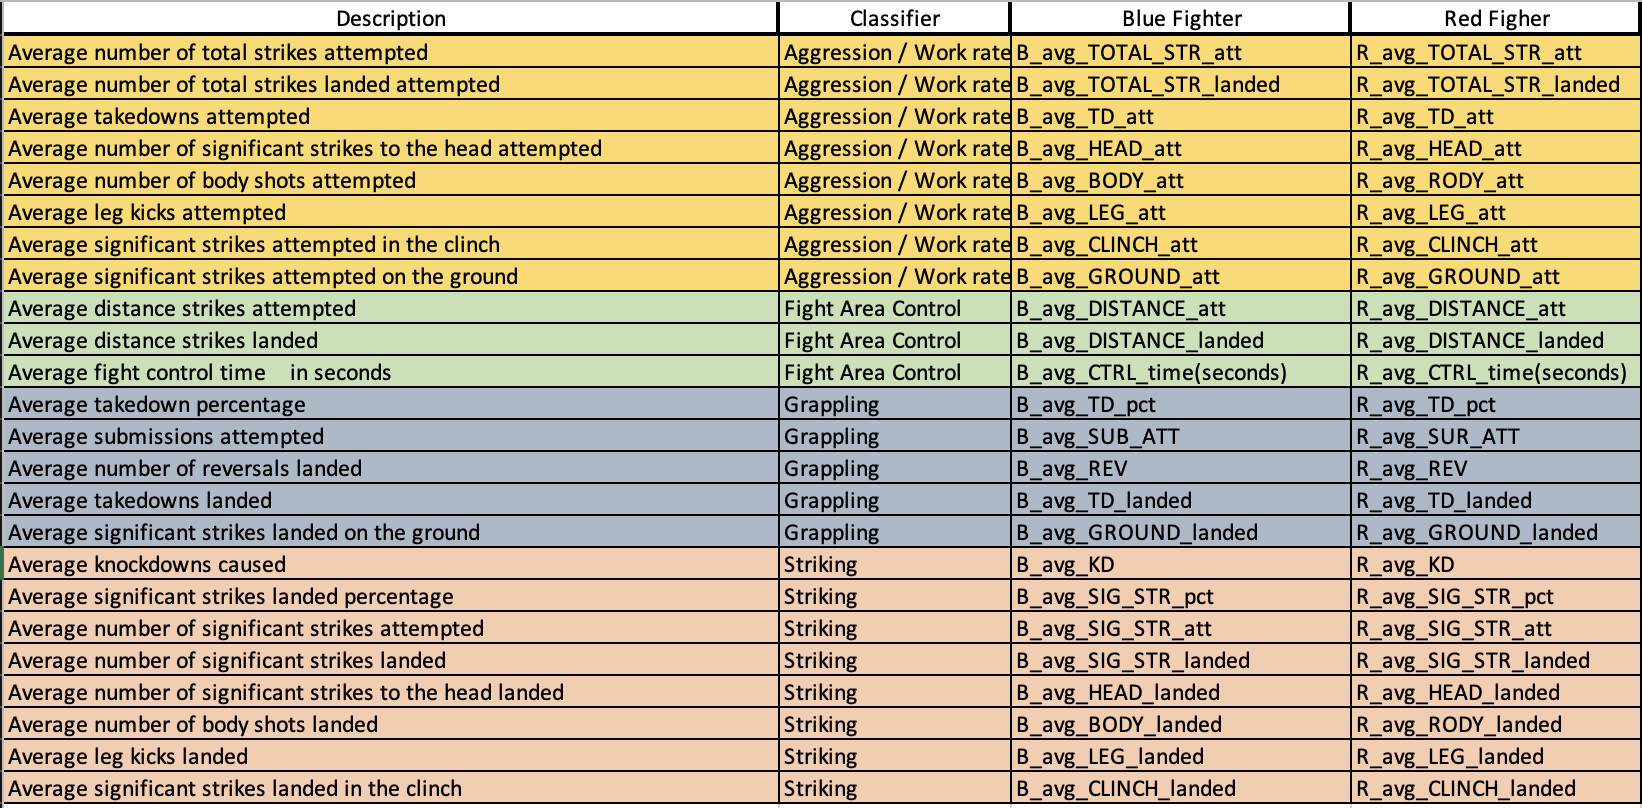

In [38]:
from IPython import display
display.Image("/Users/vishangunatilleka/Queen_Mary/Term2/ECS784U_Data_Analytics/project2/ufc_data_kaggle_v2_08.03/feature_table.png")

In [41]:
# Select the columns to combine and calculate the mean
work_rate_B_fighter = ['B_avg_TOTAL_STR_att', 'B_avg_TOTAL_STR_landed', 'B_avg_TD_att', 'B_avg_HEAD_att', 'B_avg_BODY_att', 'B_avg_LEG_att', 'B_avg_CLINCH_att', 'B_avg_GROUND_att']
work_rate_B_fighter = data[work_rate_B_fighter].mean(axis=1)

fight_area_B_fighter = ['B_avg_DISTANCE_att','B_avg_DISTANCE_landed','B_avg_CTRL_time(seconds)']
fight_area_B_fighter = data[fight_area_B_fighter].mean(axis=1)

grappling_B_fighter = ['B_avg_TD_pct','B_avg_SUB_ATT','B_avg_REV','B_avg_TD_landed','B_avg_GROUND_landed']
grappling_B_fighter = data[grappling_B_fighter].mean(axis=1)

striking_B_fighter = ['B_avg_KD','B_avg_SIG_STR_pct','B_avg_SIG_STR_att','B_avg_SIG_STR_landed','B_avg_HEAD_landed','B_avg_BODY_landed','B_avg_LEG_landed','B_avg_CLINCH_landed']
striking_B_fighter = data[striking_B_fighter].mean(axis=1)

work_rate_R_fighter = ['R_avg_TOTAL_STR_att', 'R_avg_TOTAL_STR_landed', 'R_avg_TD_att', 'R_avg_HEAD_att', 'R_avg_BODY_att', 'R_avg_LEG_att', 'R_avg_CLINCH_att', 'R_avg_GROUND_att']
work_rate_R_fighter = data[work_rate_R_fighter].mean(axis=1)

fight_area_R_fighter = ['R_avg_DISTANCE_att','R_avg_DISTANCE_landed','R_avg_CTRL_time(seconds)']
fight_area_R_fighter = data[fight_area_R_fighter].mean(axis=1)

grappling_R_fighter = ['R_avg_TD_pct','R_avg_SUB_ATT','R_avg_REV','R_avg_TD_landed','R_avg_GROUND_landed']
grappling_R_fighter = data[grappling_R_fighter].mean(axis=1)

striking_R_fighter = ['R_avg_KD','R_avg_SIG_STR_pct','R_avg_SIG_STR_att','R_avg_SIG_STR_landed','R_avg_HEAD_landed','R_avg_BODY_landed','R_avg_LEG_landed','R_avg_CLINCH_landed']
striking_R_fighter = data[striking_R_fighter].mean(axis=1)

# Create a new dataframe with the combined column and additional columns
new_data = pd.DataFrame({
    'R_fighter': data['R_fighter'],
    'B_fighter': data['B_fighter'],
    'Winner': data['Winner'],
    'B_current_win_streak':data['B_current_win_streak'],
    'B_current_lose_streak':data['B_current_lose_streak'],
    'B_wins':data['B_wins'],
    'B_losses':data['B_losses'],
    'B_draw':data['B_draw'],
    'B_win_by_Decision_Majority':data['B_win_by_Decision_Majority'],
    'B_win_by_Decision_Split':data['B_win_by_Decision_Split'],
    'B_win_by_Decision_Unanimous':data['B_win_by_Decision_Unanimous'],
    'B_win_by_KO/TKO':data['B_win_by_KO/TKO'],
    'B_win_by_Submission':data['B_win_by_Submission'],
    'B_win_by_TKO_Doctor_Stoppage':data['B_win_by_TKO_Doctor_Stoppage'],
    'B_Stance':data['B_Stance'],
    'B_Height_cms':data['B_Height_cms'],
    'B_Reach_cms':data['B_Reach_cms'],
    'B_Weight_lbs':data['B_Weight_lbs'],
    'B_age':data['B_age'],
    'work_rate_B_fighter': work_rate_B_fighter,
    'fight_area_B_fighter':fight_area_B_fighter,
    'grappling_B_fighter': grappling_B_fighter,
    'striking_B_fighter': striking_B_fighter,
    'R_current_win_streak':data['R_current_win_streak'],
    'R_current_lose_streak':data['R_current_lose_streak'],
    'R_wins':data['R_wins'],
    'R_losses':data['R_losses'],
    'R_draw':data['R_draw'],
    'R_win_by_Decision_Majority':data['R_win_by_Decision_Majority'],
    'R_win_by_Decision_Split':data['R_win_by_Decision_Split'],
    'R_win_by_Decision_Unanimous':data['R_win_by_Decision_Unanimous'],
    'R_win_by_KO/TKO':data['R_win_by_KO/TKO'],
    'R_win_by_Submission':data['R_win_by_Submission'],
    'R_win_by_TKO_Doctor_Stoppage':data['R_win_by_TKO_Doctor_Stoppage'],
    'R_Stance':data['R_Stance'],
    'R_Height_cms':data['R_Height_cms'],
    'R_Reach_cms':data['R_Reach_cms'],
    'R_Weight_lbs':data['R_Weight_lbs'],
    'R_age':data['R_age'],
    'work_rate_R_fighter': work_rate_R_fighter,
    'fight_area_R_fighter':fight_area_R_fighter,
    'grappling_R_fighter': grappling_R_fighter,
    'striking_B_fighter': striking_B_fighter,
})

# Print the new dataframe
new_data

,R_fighter,B_fighter,Winner,B_current_win_streak,B_current_lose_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,B_age,work_rate_B_fighter,fight_area_B_fighter,grappling_B_fighter,striking_B_fighter,R_current_win_streak,R_current_lose_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,R_age,work_rate_R_fighter,fight_area_R_fighter,grappling_R_fighter
0,11,691,2,0,1,1,1,0,0,0,0,0,1,0,1,165.10,170.18,135.00,31.00,23.00,27.17,0.97,11.87,1,0,1,0,0,0,0,0,1,0,0,1,170.18,177.80,135.00,27.00,11.00,18.00,0.00
1,1422,1616,2,2,0,2,0,0,0,0,0,1,0,0,1,187.96,193.04,205.00,32.00,32.19,102.50,1.56,17.14,2,0,4,2,0,0,0,0,3,0,0,1,182.88,187.96,185.00,28.00,31.05,88.30,2.17
2,1360,700,2,0,0,0,0,0,0,0,0,0,0,0,1,187.96,190.50,241.00,32.00,15.59,28.48,0.44,9.67,3,0,4,3,0,0,0,1,3,0,0,3,187.96,190.50,264.00,28.00,23.06,49.54,0.31
3,236,1380,0,0,0,0,0,0,0,0,0,0,0,0,3,152.40,154.94,115.00,28.00,44.53,77.00,0.80,29.37,0,0,0,0,0,0,0,0,0,0,0,4,160.02,160.02,115.00,25.00,32.95,72.45,0.95
4,947,1196,0,0,0,4,1,0,0,0,1,2,1,0,1,180.34,182.88,135.00,29.00,58.28,144.94,4.04,31.82,2,0,5,6,0,0,0,1,2,2,0,1,167.64,172.72,135.00,43.00,42.80,85.01,0.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6007,1183,30,2,0,0,0,0,0,0,0,0,0,0,0,5,172.72,186.44,238.00,31.80,17.30,36.53,2.20,7.53,0,0,0,0,0,0,0,0,0,0,0,3,190.50,197.61,260.00,28.00,14.60,46.26,1.42
6008,1106,1588,2,0,0,0,0,0,0,0,0,0,0,0,5,187.96,199.14,245.00,28.80,10.79,17.00,0.74,6.42,0,0,0,0,0,0,0,0,0,0,0,3,177.80,191.01,170.00,27.40,7.65,2.56,0.72
6009,709,475,2,0,0,0,0,0,0,0,0,0,0,0,5,195.58,200.66,275.00,28.20,24.02,42.81,2.00,13.81,0,0,0,0,0,0,0,0,0,0,0,1,182.88,189.99,210.00,31.20,20.50,33.86,1.60
6010,1121,1542,2,0,0,0,0,0,0,0,0,0,0,0,5,184.40,192.02,219.00,27.80,15.59,21.73,0.93,7.94,0,0,0,0,0,0,0,0,0,0,0,1,187.96,189.48,225.00,30.00,9.30,56.51,1.08


In [42]:
X2 = new_data.drop('Winner', axis=1)
Y2 = new_data['Winner']

In [47]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size=0.25, random_state=42)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [48]:
print("Training size = {}".format(X_train.shape[0]))
print("Testing size = {}".format(X_test.shape[0]))

Training size = 4509
Testing size = 1503


In [49]:
print("Training size = {}".format(X2_train.shape[0]))
print("Testing size = {}".format(X2_test.shape[0]))

Training size = 4509
Testing size = 1503
